In [9]:
import numpy as np
from numpy.linalg import *
from LogisReg import LogisticRegression
from sklearn.linear_model import LinearRegression as sklLinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, model_selection, metrics
import pandas as pd
import sys, importlib
importlib.reload(sys.modules['LogisReg'])
from LogisReg import LogisticRegression

In [10]:
df=pd.read_csv('Data/Glass.csv')
df_tar=df['Target']
df=df.drop('Target', axis=1)
df=(df-df.min())/(df.max()-df.min())
df['bias']=1
df_tar=pd.get_dummies(df_tar)

In [11]:
LogisticRegression(init_theta=np.random.random((df.shape[1], df_tar.shape[1]))*2-1)\
    .kfoldcrossval(df.values,df_tar.values, len(df)//10)

E:\User Applications\Software\Miniconda3\envs\SpikingJelly\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\User Applications\Software\Miniconda3\envs\SpikingJelly\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\User Applications\Software\Miniconda3\envs\SpikingJelly\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

{'0': {'precision': 0.2234848484848485,
  'recall': 0.1117965367965368,
  'f1-score': 0.12878787878787878,
  'support': 3.1818181818181817},
 '1': {'precision': 0.34749278499278496,
  'recall': 0.7195887445887447,
  'f1-score': 0.4171063784700147,
  'support': 3.4545454545454546},
 'accuracy': 0.2818181818181818}

In [12]:
train_data, test_data = pd.DataFrame(),pd.DataFrame()
for tr_col in df_tar.columns:
    train, test = model_selection.train_test_split(df[df_tar[tr_col]==1], test_size=0.2, random_state=45)
    train_data=pd.concat([train,train_data])
    test_data= pd.concat([test, test_data])
train_data_base = {'x': train_data, 'y': df_tar[df_tar.index.isin(train_data.index)]}
test_data_base = {'x': test_data, 'y': df_tar[df_tar.index.isin(test_data.index)]}

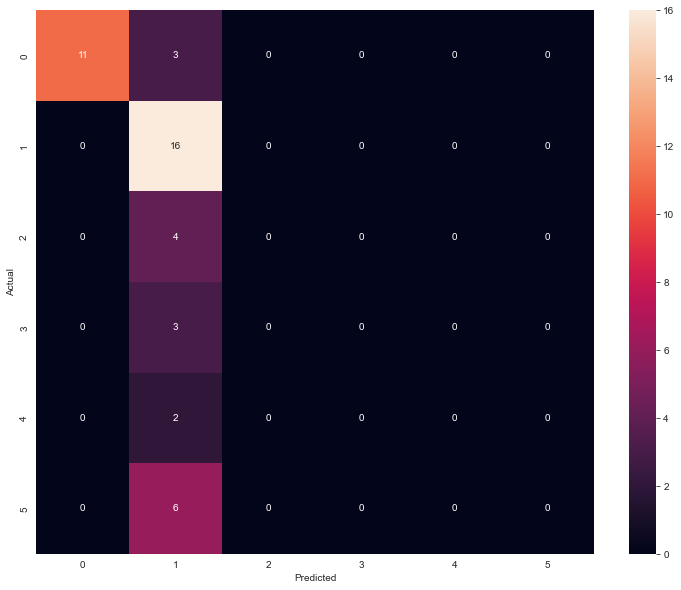

In [16]:
import sys, importlib
importlib.reload(sys.modules['LogisReg'])
from LogisReg import LogisticRegression

model = LogisticRegression(init_theta=np.random.random((df.shape[1], df_tar.shape[1]))*2-1)
model.fit(train_data_base['x'].values,train_data_base['y'].values, 100, 1)
model.fit(train_data_base['x'].values,train_data_base['y'].values, 100, 0.5)
model.fit(train_data_base['x'].values,train_data_base['y'].values, 200, 0.01)
model.draw_confusion_matrix(test_data_base['x'].values,test_data_base['y'].values)

In [14]:
model.draw_uncertain(test_data_base['x'].values,test_data_base['y'].values, tresh=0.7)

ValueError: zero-size array to reduction operation fmax which has no identity

0.6


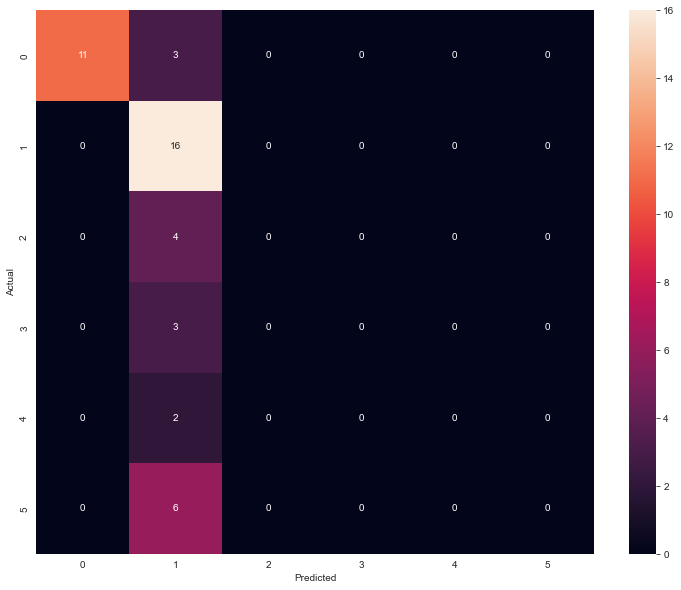

In [15]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

y = np.argmax(train_data_base['y'].values, axis=1)
ytest = np.argmax(test_data_base['y'].values, axis=1)
model = linear_model.LogisticRegression()
model.fit(train_data_base['x'], y)
print(model.score(test_data_base['x'], ytest))

pred=model.predict(test_data_base['x'])
cm = confusion_matrix(ytest, pred)
s=sns.heatmap(cm, annot=True, vmin=0)
s.set(xlabel="Predicted", ylabel="Actual")
# enlarge plot
plt.gcf().set_size_inches(12.5, 10)
plt.show(s)

In [ ]:
a=np.argmax(train_data_base['y'].values, axis=1)
print(len(a[a==0])/len(a), len(a[a==1])/len(a))
a=np.argmax(test_data_base['y'].values, axis=1)
print(len(a[a==0])/len(a), len(a[a==1])/len(a))